In [2]:
import matplotlib.pyplot as plt
import random

In [3]:
class QuadTree:
    def __init__(self,l,r,t,b,level):
        self.level = level

        self.quads = [None,None,None,None]
        self.l = l
        self.r = r
        self.t = t
        self.b = b
        self.x = (self.l + self.r)/2
        self.y = (self.t + self.b)/2

    # 0 --> l, 1 --> x, 2 --> l, 3 --> x      quad%2*self.x + (quad+1)%2*self.l
    # quad%2*self.x + (quad+1)%2*self.l, quad%2*self.r + (quad+1)%2*self.x, quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y
    # quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y


    def _genQuad_(self):
        if self.level <= 4:
            self.quads[0] = QuadTree(self.l,self.x,self.t,self.y,self.level+1)        
            self.quads[1] = QuadTree(self.x,self.r,self.t,self.y,self.level+1)        
            self.quads[2] = QuadTree(self.l,self.x,self.y,self.b,self.level+1)        
            self.quads[3] = QuadTree(self.x,self.r,self.y,self.b,self.level+1)
        else:
            self.quads[0] = leaf(self.l,self.x,self.t,self.y)
            self.quads[1] = leaf(self.x,self.r,self.t,self.y)
            self.quads[2] = leaf(self.l,self.x,self.y,self.b)
            self.quads[3] = leaf(self.x,self.r,self.y,self.b)


    def __repr__(self):
        return f"level:{self.level}\t\t{self.t}  ^\t\t\n|{self.l}<--\t({self.x},{self.y})\t-->{self.r}|\n\t\t{self.b}  v\t\t"
    
    def _print_(self):
        print(self)
        if self.quads[0]:
            self.quads[0]._print_()
        if self.quads[1]:
            self.quads[1]._print_()
        if self.quads[2]:
            self.quads[2]._print_()
        if self.quads[3]:
            self.quads[3]._print_()

    
    def _inQuad_(self,coords):
        if coords[0] >= self.l and coords[0] < self.x:
            if coords[1] <= self.t and coords[1] > self.y:
                return 0
            if coords[1] <= self.y and coords[1] >= self.b:
                return 2
        if coords[0] >= self.x and coords[0] <= self.r:
            if coords[1] <= self.t and coords[1] > self.y:
                return 1
            if coords[1] <= self.y and coords[1] >= self.b:
                return 3
        return -1
    
    def _insert_(self,coords,maxlvl=4):
        # print(f"coords:{coords[0]},{coords[1]}")
        quad = self._inQuad_(coords)
        # print(quad)
        if self.quads[quad] == None:
            if self.level < maxlvl:
                # print(f"level:{self.level}")
                self.quads[quad] = QuadTree(quad%2*self.x + (quad+1)%2*self.l, quad%2*self.r + (quad+1)%2*self.x, quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y,self.level+1)
                # print(self.quads[quad])
                self.quads[quad]._insert_(coords,maxlvl)
            else:
                self.quads[quad] = leaf(quad%2*self.x + (quad+1)%2*self.l, quad%2*self.r + (quad+1)%2*self.x, quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y)
                self.quads[quad]._insert(coords)
        else:
            if type(self.quads[quad]) == leaf:
                self.quads[quad]._insert(coords)
            else:
                self.quads[quad]._insert_(coords,maxlvl)


    def _plot_(self):
        plt.plot([self.l,self.r,self.r,self.l,self.l],[self.t,self.t,self.b,self.b,self.t], color='black', linewidth=0.5)
        plt.plot([self.l,self.r],[self.y,self.y], color='black',linewidth=0.5)
        plt.plot([self.x,self.x],[self.t,self.b], color='black', linewidth=0.5)
        
        if self.quads[0]:
            self.quads[0]._plot_()
        if self.quads[1]:
            self.quads[1]._plot_()
        if self.quads[2]:
            self.quads[2]._plot_()
        if self.quads[3]:
            self.quads[3]._plot_()

    def _findNearby_(self,coords):
        quad = self._inQuad_(coords)
        if self.quads[quad]:
            if type(self.quads[quad]) == QuadTree:
                return self.quads[quad]._findNearby_(coords)
            elif type(self.quads[quad]) == leaf:
                return self.quads[quad].arr
        else:
            return []

class leaf:
    def __init__(self,l,r,t,b):
        self.arr = []
        self.l = l
        self.r = r
        self.t = t
        self.b = b
        self.x = (self.l + self.r)/2
        self.y = (self.t + self.b)/2

    def _insert(self,coords):
        self.arr.append(coords)
    
    def _plot_(self):
        plt.plot([self.l,self.r,self.r,self.l,self.l],[self.t,self.t,self.b,self.b,self.t], color='green', linewidth=0.5)
    
    def __repr__(self):
        return f"level:leaf\t\t{self.t}  ^\t\t\n|{self.l}<--\t({self.x},{self.y})\t-->{self.r}|\n\t\t{self.b}  v\t\t"
    
    def _print_(self):
        print(self)

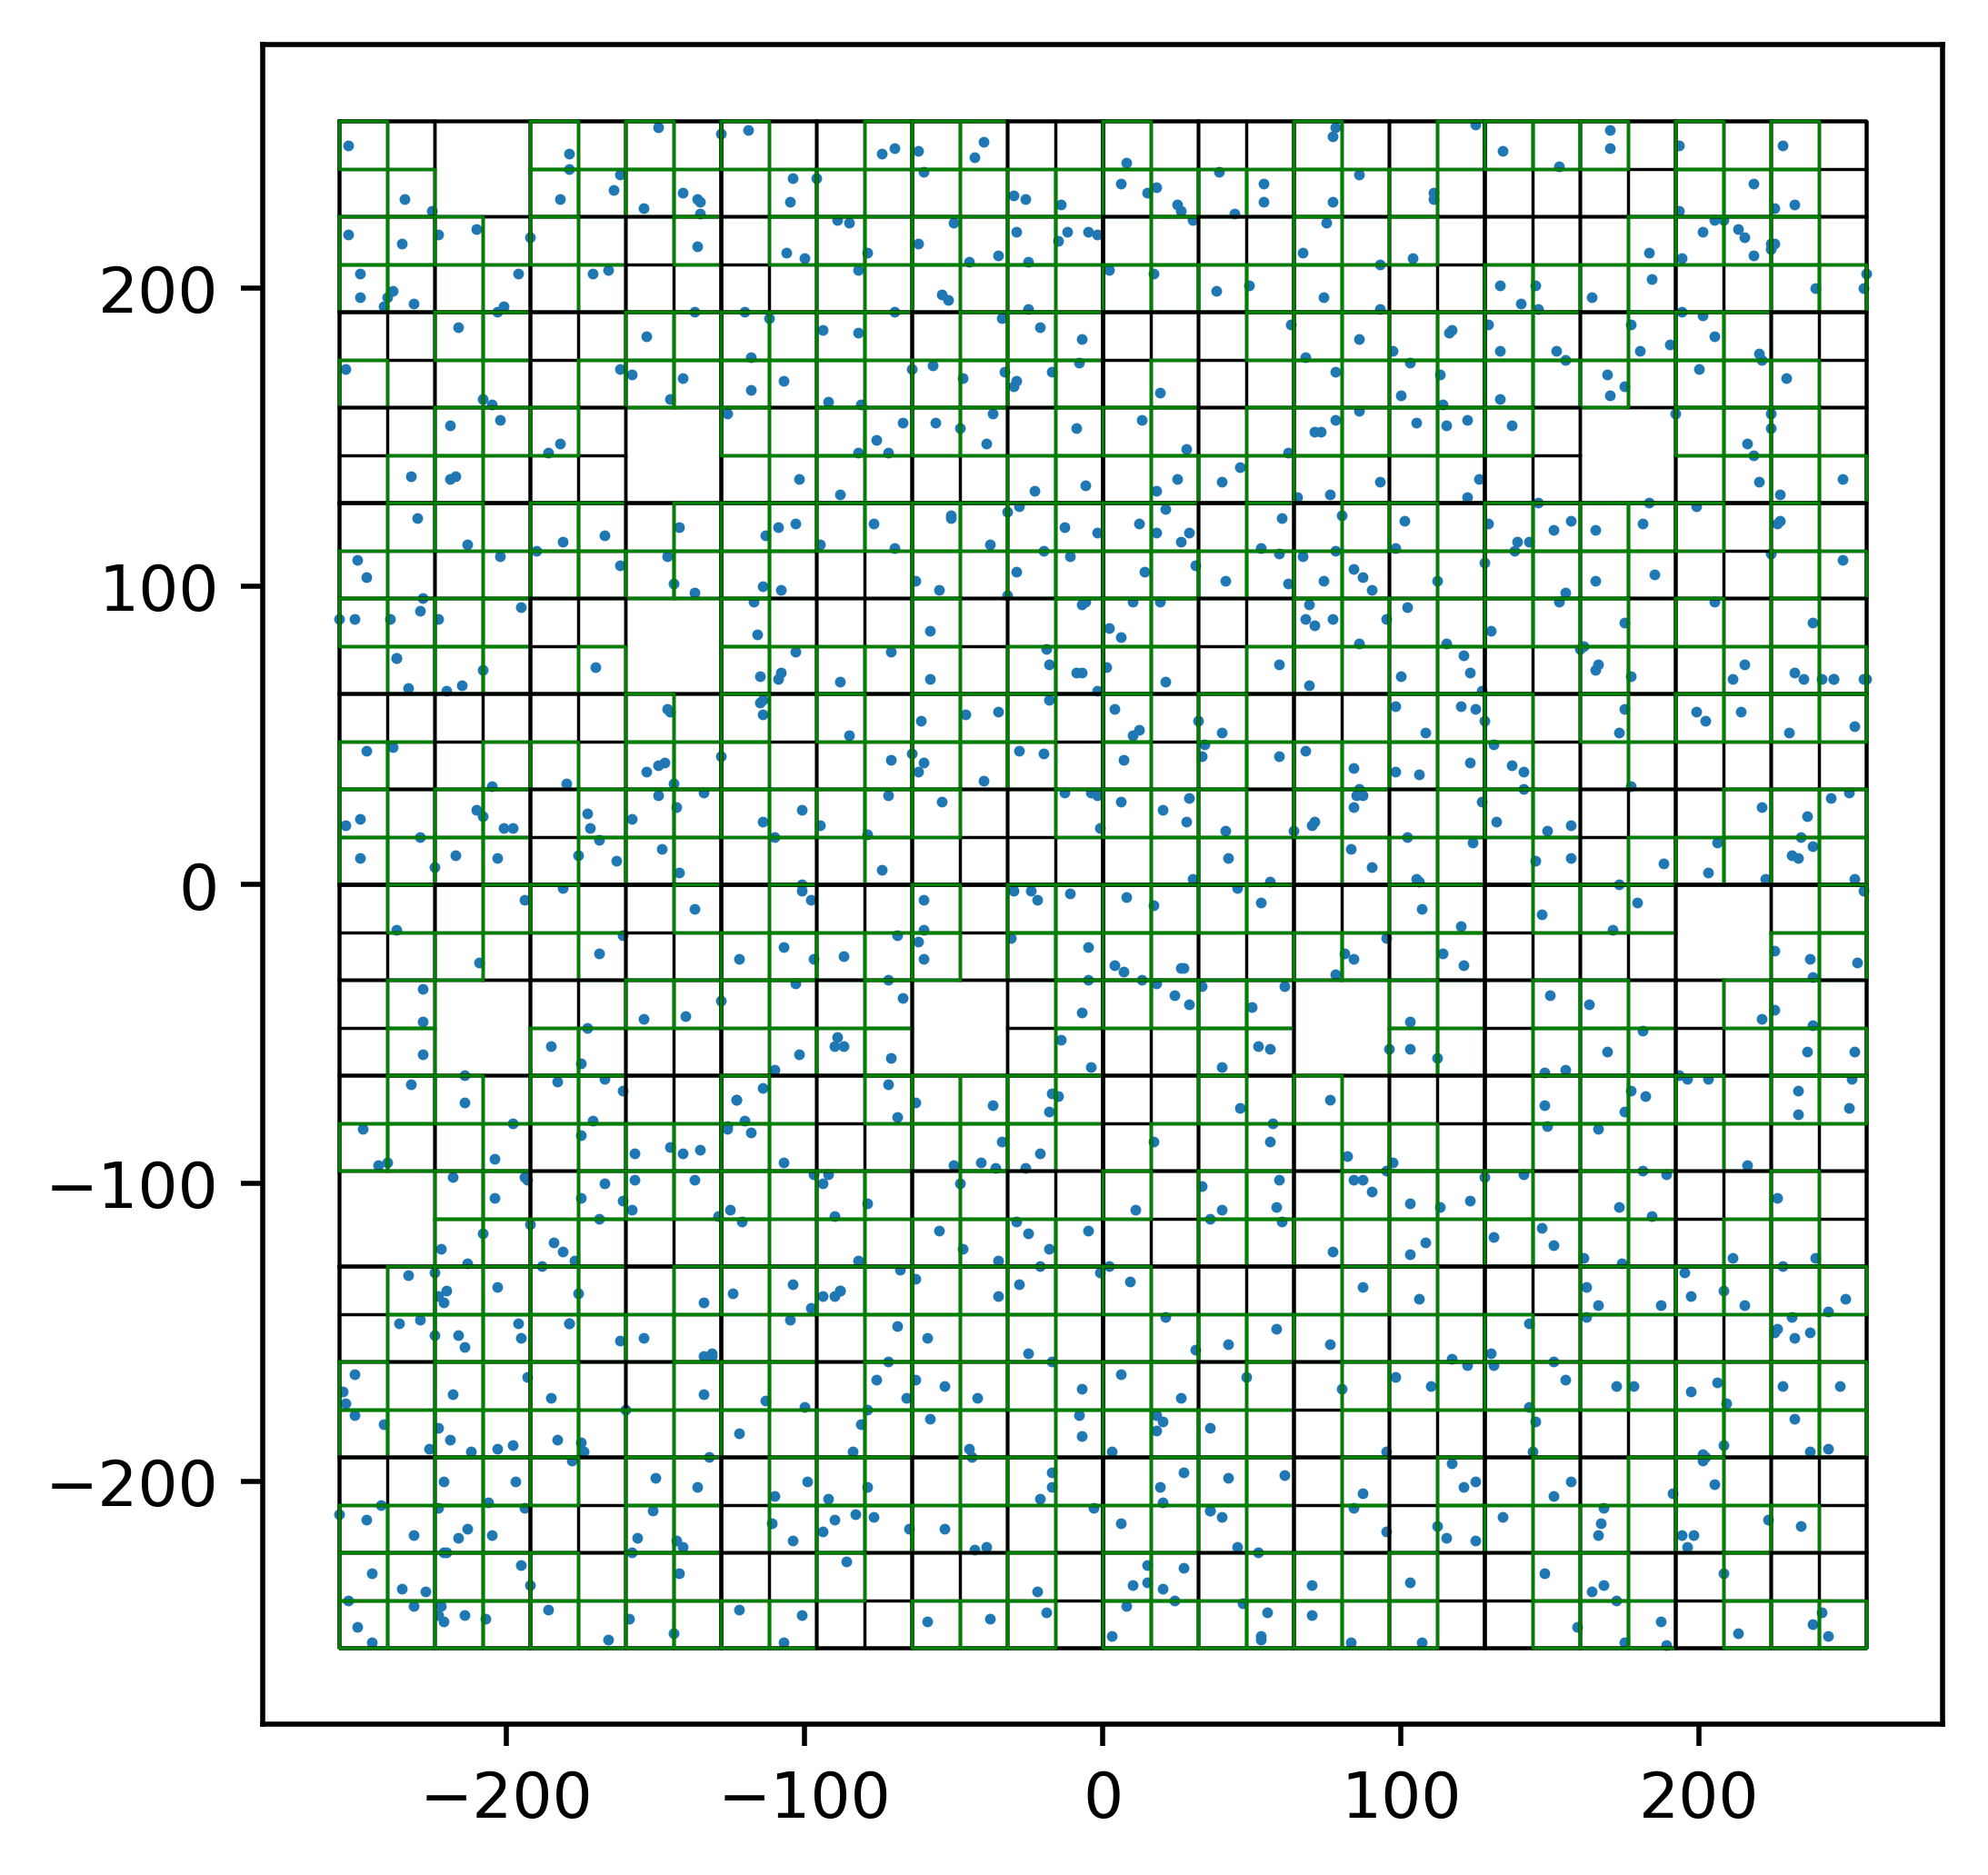

In [8]:
length = 256
count = 1000
maxlevel = 4


plt.figure(dpi=500)
plt.xlim(-1*length,length)
plt.ylim(-1*length,length)

coords = []
x = []
y = []
for i in range(0, count):
    x.append(random.randint(-1*length,length))
    y.append(random.randint(-1*length,length))
coords.append(x)
coords.append(y)
q = QuadTree(-1*length,length,length,-1*length,0)
for i in range(len(coords[0])):
    q._insert_([coords[0][i],coords[1][i]],maxlevel)
plt.scatter(x,y,s=0.5)
q._plot_()
plt.axis('square')
plt.show()

In [12]:
x1 = random.randint(-1*length,length)
y1 = random.randint(-1*length,length)
# plt.scatter(x1,y1,s=10,color='red',marker='x')
q._findNearby_([x1,y1])


[]

In [6]:
# x1 = [-50,50,-200]
# y1 = [50,50,200]
# c1 = []
# c1.append(x1)
# c1.append(y1)

# for i in range(len(c1[0])):
#     q.tmp_insert([c1[0][i],c1[1][i]])
# plt.scatter(x1,y1)